In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# width_dataset_init_off_58
experiment_path = "../mlruns/941592410386083679/"

# width_dataset_init_off_60
experiment_path = "../mlruns/640715605674881862/"

run_paths = [os.path.join(experiment_path, name) for name in os.listdir(experiment_path) if os.path.isdir(os.path.join(experiment_path, name))]


experiment_df = pd.DataFrame()
for rp in run_paths:

    # load params
    params_df = pd.DataFrame()
    params_path = os.path.join(rp, "params")
    for param_name in os.listdir(params_path):
        param_file = os.path.join(params_path, param_name)
        df = pd.read_csv(param_file, sep=' ', header=None)
        #df.columns = ['Value']
        params_df[param_name] = df[0]
        #run_df[metric_name] = metric_df['Value']

    # Add run_path as identifier for the run
    params_df['run_path'] = rp

    metrics_df = pd.DataFrame()
    metrics_path = os.path.join(rp, "metrics") 
    for metric_name in os.listdir(metrics_path):
        metric_file = os.path.join(metrics_path, metric_name)

        df = pd.read_csv(metric_file, sep=' ', header=None)
        df.columns = ['Timestamp', 'Value', 'Index']

        if metrics_df.empty:
            metrics_df["step"] = df['Index']

        metrics_df[metric_name] = df['Value']

    if not params_df.empty and not metrics_df.empty:
        df1_repeated = pd.concat([params_df]*metrics_df.shape[0], ignore_index=True)
        run_df = pd.concat([df1_repeated, metrics_df], axis=1)
        experiment_df = pd.concat([experiment_df, run_df], axis=0, ignore_index=True)



In [2]:
experiment_df.columns

Index(['experiment_name', 'device_index', 'seed', 'hidden_width',
       'hidden_depth', 'steps', 'grid', 'k', 'mode', 'base_fun',
       'spline_noise_scale', 'init_mode', 'sp_trainable', 'sb_trainable',
       'affine_trainable', 'update_grid', 'dataset', 'moon_noise_level',
       'random_distribution', 'random_input_dim', 'random_output_dim',
       'random_uniform_range_min', 'random_uniform_range_max',
       'random_normal_mean', 'random_normal_std', 'symbolic_regression',
       'plot_initialized_model', 'plot_trained_model', 'save_video',
       'save_model', 'spline_noise_scale_class', 'run_path', 'step',
       'train_loss', 'test_loss', 'reg', 'train_acc', 'test_acc',
       'classifier_probe_train_accuracy', 'classifier_probe_test_accuracy'],
      dtype='object')

# Test Accuracy per Initialization Mode

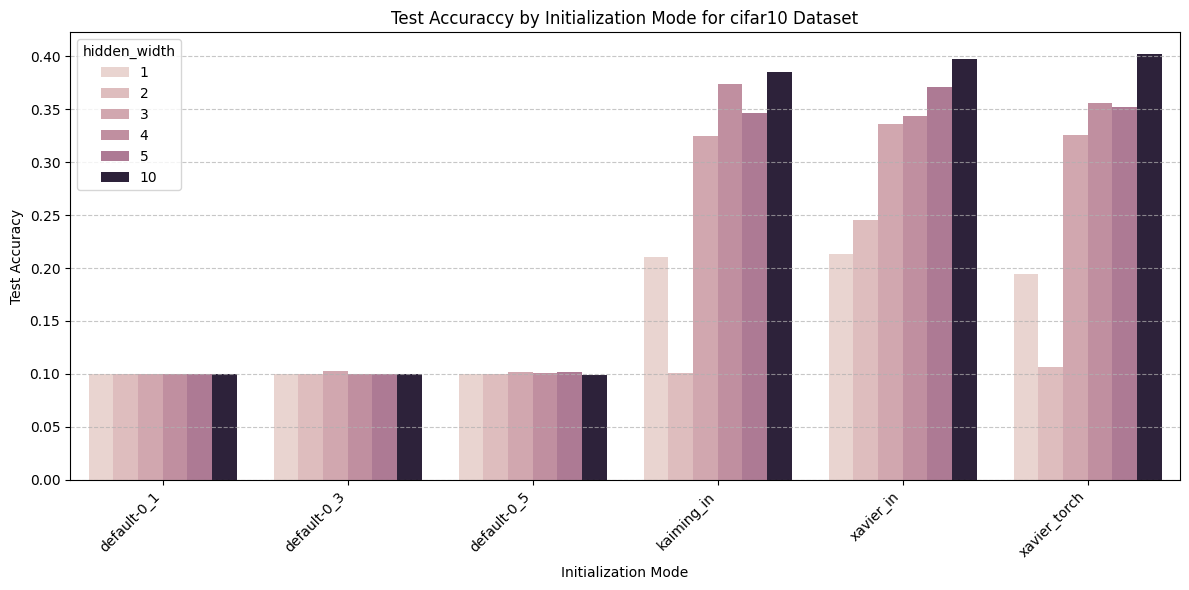

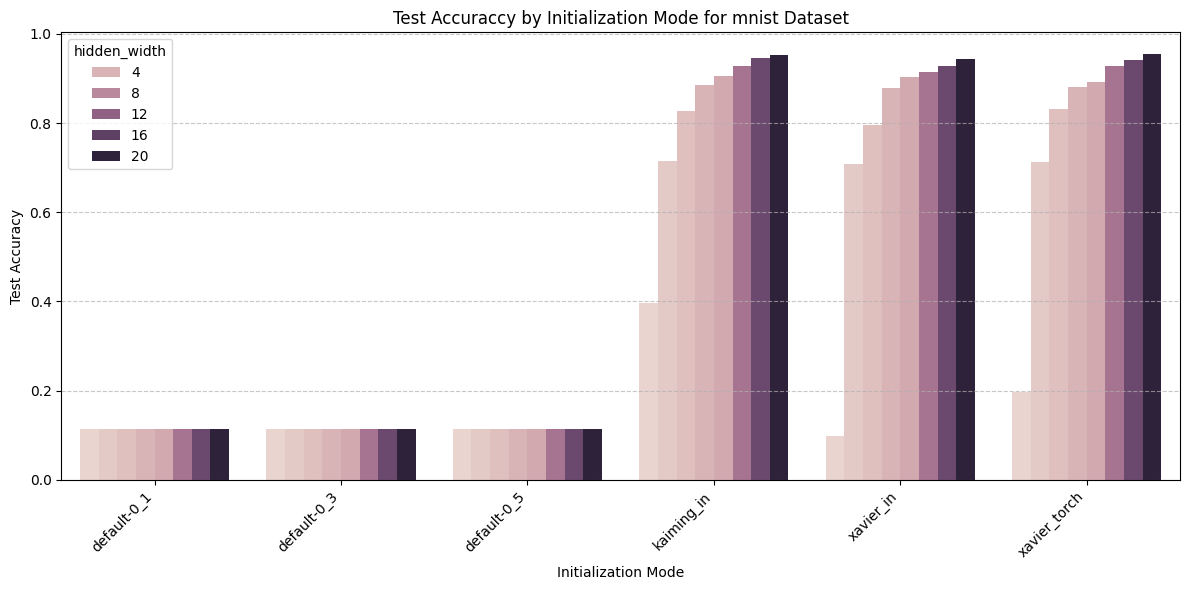

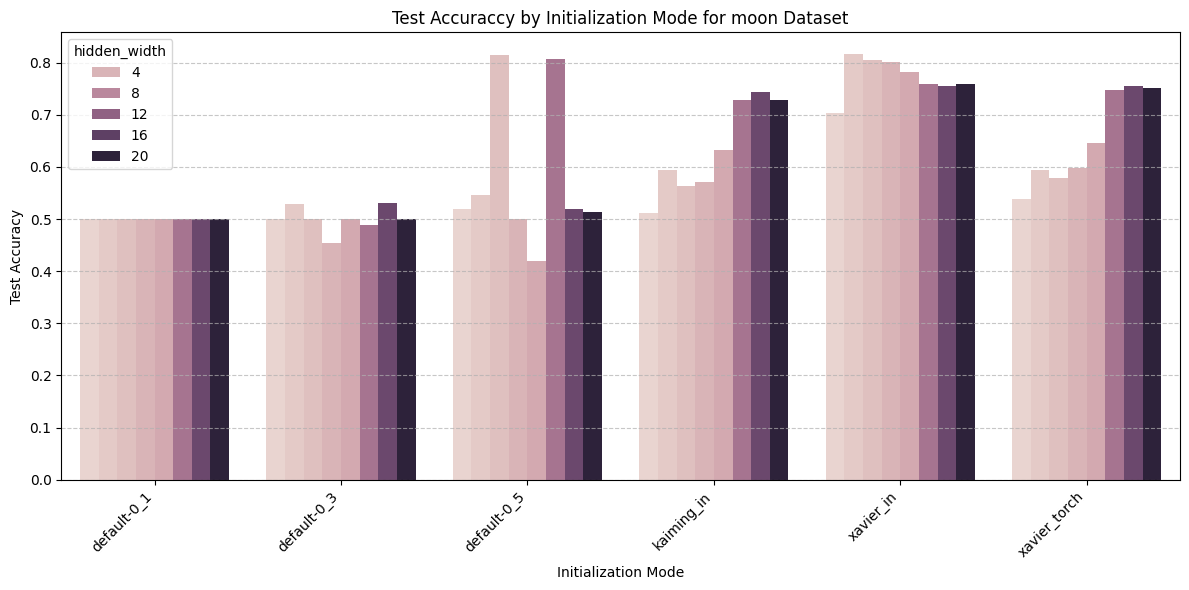

In [11]:
#datasets = ['cifar10', 'mnist', 'random', 'moon']
datasets = ['cifar10', 'mnist', 'moon']
for ds in datasets:

    filtered_df = experiment_df
    filtered_df = filtered_df[filtered_df['dataset'] == ds]


    # # Take the last accuracy
    # filtered_df = filtered_df[filtered_df['step'] == 99]

    # take the run with the highest train_acc
    idx = filtered_df.groupby('run_path')['train_acc'].idxmax()
    filtered_df = filtered_df.loc[idx]

    # acc dist
    filtered_df["acc_dist"] = np.abs(filtered_df['train_acc'] - filtered_df['test_acc'])

    # calc score 
    k = 1
    filtered_df["score"] = filtered_df['test_acc'] - (k * filtered_df["acc_dist"])

    # Filter out spline_noise_scale outside 0 and 1
    #filtered_df = filtered_df[(filtered_df['spline_noise_scale'] >= 0) & (filtered_df['spline_noise_scale'] <= 1)]


    # Define the list of init_mode values to filter
    init_modes_to_keep = ["xavier_torch", "xavier_in", "kaiming_in", "default-0_1", "default-0_3", "default-0_5"]
    # Filter the DataFrame
    filtered_df = filtered_df[filtered_df['init_mode'].isin(init_modes_to_keep)]
    filtered_df.rename(columns={'xavier_torch': 'xavier'}, inplace=True)
    filtered_df = filtered_df.sort_values(by='init_mode', ascending=True)

    plt.figure(figsize=(12, 6))

    # Create barplot with init_mode on x-axis and score on y-axis
    #sns.barplot(data=filtered_df, x='init_mode', y='score', errorbar=None)
    sns.barplot(data=filtered_df, x='init_mode', y='test_acc', hue='hidden_width', errorbar=None)
    #sns.barplot(data=filtered_df, x='init_mode', y='train_acc', errorbar=None)

    # Customize the plot
    plt.title(f'Test Accuraccy by Initialization Mode for {ds} Dataset')
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Initialization Mode')
    plt.ylabel('Test Accuracy')

    # Add grid for better readability
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()



# Score per Initialization Mode

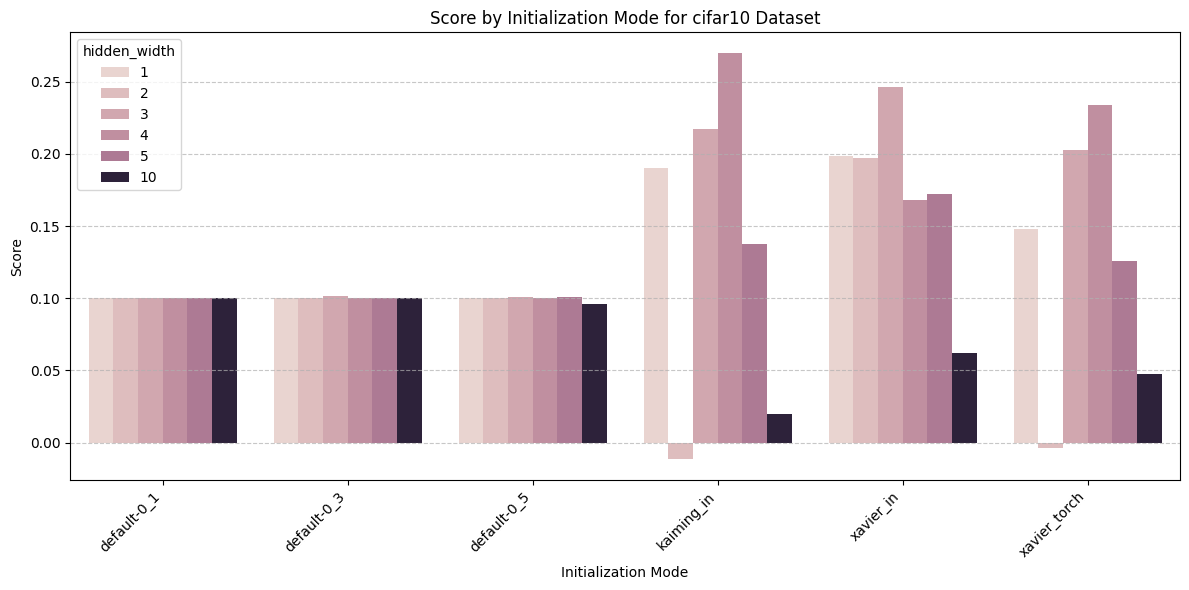

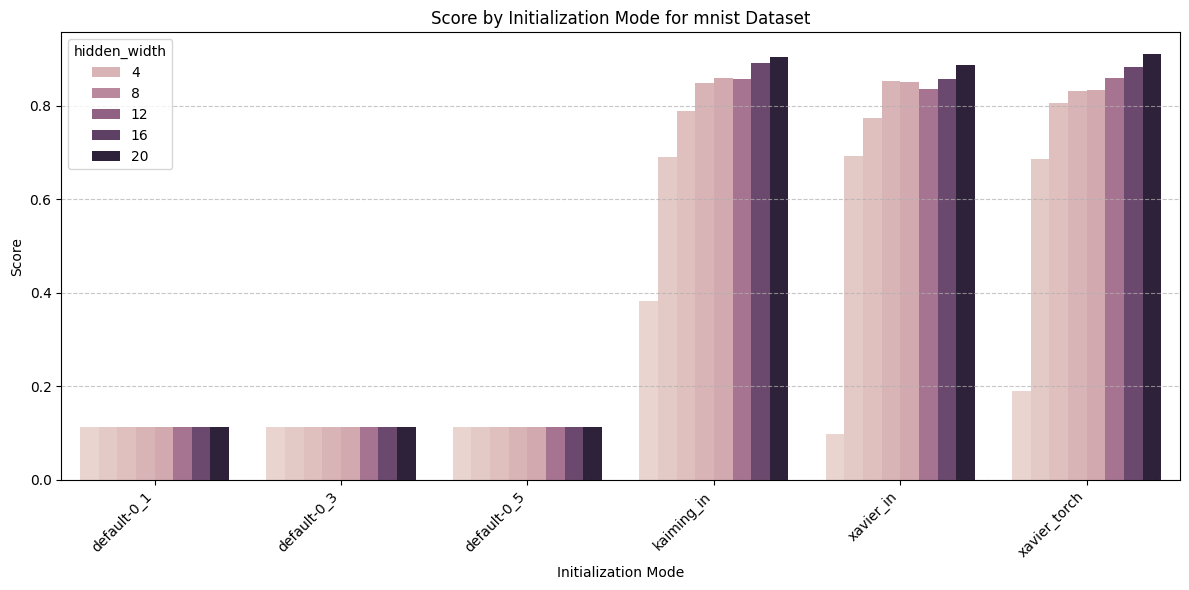

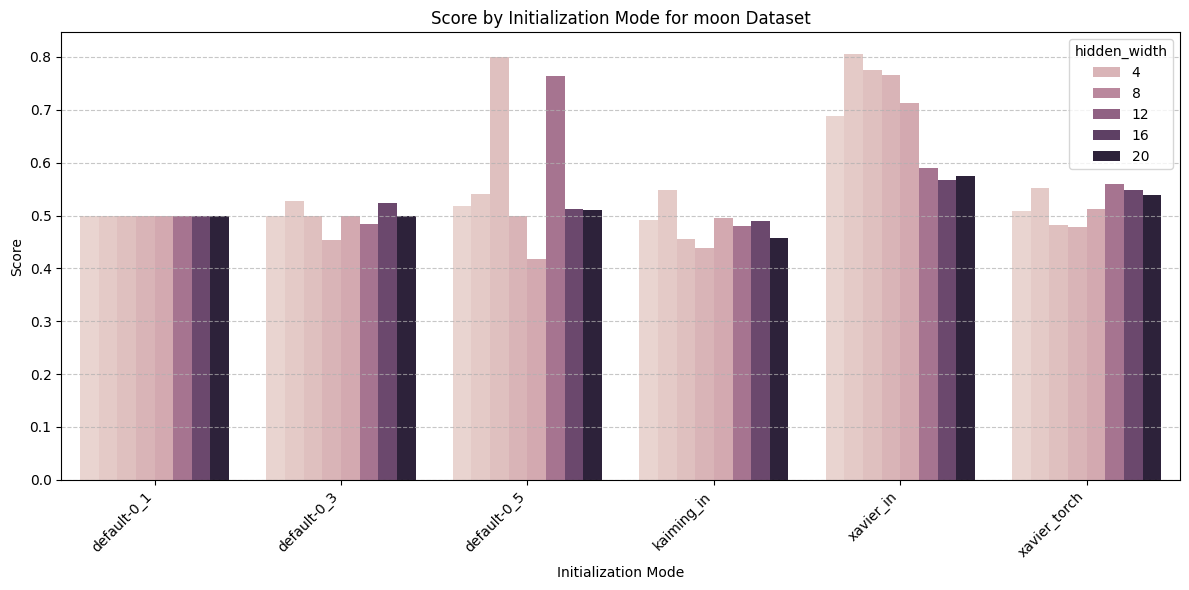

In [13]:
datasets = ['cifar10', 'mnist', 'moon']
for ds in datasets:

    filtered_df = experiment_df
    filtered_df = filtered_df[filtered_df['dataset'] == ds]


    # # Take the last accuracy
    # filtered_df = filtered_df[filtered_df['step'] == 99]

    # take the run with the highest train_acc
    idx = filtered_df.groupby('run_path')['train_acc'].idxmax()
    filtered_df = filtered_df.loc[idx]

    # acc dist
    filtered_df["acc_dist"] = np.abs(filtered_df['train_acc'] - filtered_df['test_acc'])

    # calc score 
    k = 1
    filtered_df["score"] = filtered_df['test_acc'] - (k * filtered_df["acc_dist"])

    # Filter out spline_noise_scale outside 0 and 1
    #filtered_df = filtered_df[(filtered_df['spline_noise_scale'] >= 0) & (filtered_df['spline_noise_scale'] <= 1)]


    # Define the list of init_mode values to filter
    init_modes_to_keep = ["xavier_torch", "xavier_in", "kaiming_in", "default-0_1", "default-0_3", "default-0_5"]
    # Filter the DataFrame
    filtered_df = filtered_df[filtered_df['init_mode'].isin(init_modes_to_keep)]
    filtered_df.rename(columns={'xavier_torch': 'xavier'}, inplace=True)
    filtered_df = filtered_df.sort_values(by='init_mode', ascending=True)

    plt.figure(figsize=(12, 6))

    # Create barplot with init_mode on x-axis and score on y-axis
    sns.barplot(data=filtered_df, x='init_mode', y='score', hue='hidden_width', errorbar=None)
    
    # Customize the plot
    plt.title(f'Score by Initialization Mode for {ds} Dataset')
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Initialization Mode')
    plt.ylabel('Score')

    # Add grid for better readability
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()
